In [77]:
## 載入IMDB資料集
#從keras.datasets套件中匯入imdb
from keras.datasets import imdb
#從imdb中讀取資料
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)

In [78]:
# 訓練/測試資料的 X/y 維度
print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape)

(25000,) (25000,) (25000,) (25000,)


In [79]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [80]:
#取得第一筆的評論的分類標籤 1 = 正面 0 =負面
train_labels[0]

1

In [81]:
#找出train_data內的最大數字,確認num_words參數是否有效:
max([max(sequence) for sequence in train_data])

9999

In [82]:
# 先前每個數字代表一個英文單字 以下程式將數字還原英文單文:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ''.join([reverse_word_index.get(i -3,'?') for i in train_data[0]])

In [83]:
word_index.get('kid')

551

# 資料前處理

In [84]:
#將2層的整數list編碼成二元矩陣
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension)) # 建立全為0的矩陣
    for i, sequence in enumerate(sequences): # python 內建enumerate(容器) 可以傳回替容器(如串列 tuple)元素 加上編號
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [85]:
# 標籤資料向量化
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [86]:
x_train[0] #查看

array([0., 1., 1., ..., 0., 0., 0.])

In [87]:
y_train[0]

1.0

In [88]:
x_train.ndim #.ndim 查看有幾階(ndim屬性)

2

In [89]:
x_train.shape #.shape查看形狀

(25000, 10000)

In [90]:
x_train.dtype #.dtype查看屬性

dtype('float64')

In [91]:
#enumerate(容器) 用法
s = ['a','b','c']
list(enumerate(s))

[(0, 'a'), (1, 'b'), (2, 'c')]

# 模型定義

In [96]:
from keras import models
from keras import layers

model = models.Sequential() #建立一個網路層
model.add(layers.Dense(16, activation='relu',input_shape=(10000, ))) #輸入層
model.add(layers.Dense(16, activation='relu')) #隱藏層
model.add(layers.Dense(1, activation='relu')) #輸出層
          

In [97]:
# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [112]:
#設定驗證資料集
#前一萬個做為驗證資料集
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
#前一萬個做為驗證標籤
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [113]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
              
history = model.fit(partial_x_train, partial_y_train, epochs=20, validation_data = (x_val,y_val) ,batch_size=512)        

Epoch 1/20
30/30 [==============================] - 1s 37ms/step - loss: 1.0214 - acc: 0.5157 - val_loss: 0.7022 - val_acc: 0.5623
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.5703 - acc: 0.7076 - val_loss: 0.4368 - val_acc: 0.8030
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3672 - acc: 0.8605 - val_loss: 0.3708 - val_acc: 0.8670
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2682 - acc: 0.9063 - val_loss: 0.4038 - val_acc: 0.8758
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2201 - acc: 0.9205 - val_loss: 0.4220 - val_acc: 0.8819
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1871 - acc: 0.9375 - val_loss: 0.4442 - val_acc: 0.8892
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1489 - acc: 0.9517 - val_loss: 0.4954 - val_acc: 0.8873
Epoch 8/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1279 - a

In [114]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

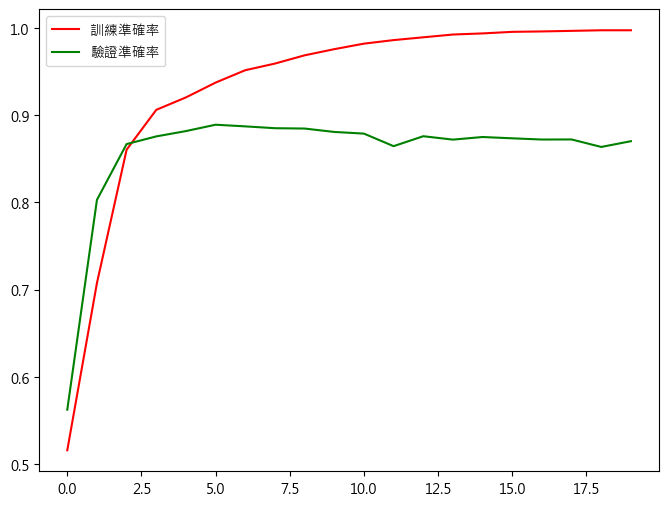

In [115]:
# 對訓練過程的準確率繪圖
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(8, 6))
plt.plot(history.history['acc'], 'r', label='訓練準確率')
plt.plot(history.history['val_acc'], 'g', label='驗證準確率')
plt.legend()

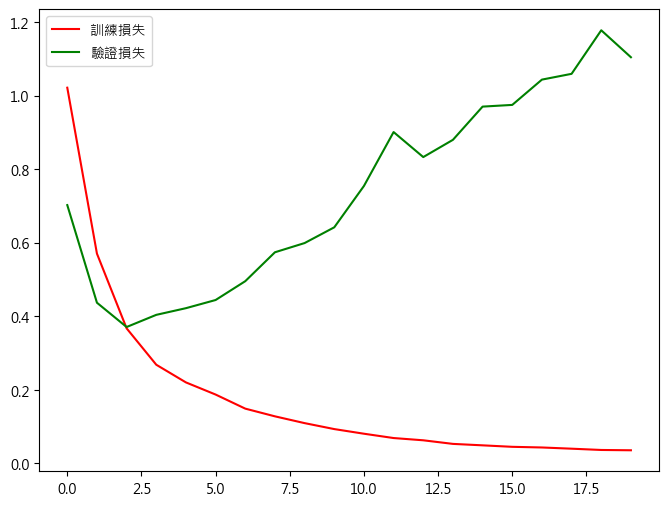

In [116]:
# 對訓練過程的損失繪圖
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], 'r', label='訓練損失')
plt.plot(history.history['val_loss'], 'g', label='驗證損失')
plt.legend()

In [119]:
results = model.evaluate(x_test, y_test)
results

782/782 [==============================] - 3s 4ms/step - loss: 1.1646 - acc: 0.8608


[1.1645866632461548, 0.86080002784729]

In [125]:
model = models.Sequential() #建立一個網路層
model.add(layers.Dense(16, activation='relu',input_shape=(10000, ))) #輸入層
model.add(layers.Dense(16, activation='relu')) #隱藏層
model.add(layers.Dense(1, activation='relu')) #輸出層

# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, validation_data = (x_val,y_val) ,batch_size=512)  

Epoch 1/20
49/49 [==============================] - 2s 33ms/step - loss: 0.5915 - accuracy: 0.7450 - val_loss: 0.3076 - val_accuracy: 0.8961
Epoch 2/20
49/49 [==============================] - 1s 21ms/step - loss: 0.3377 - accuracy: 0.8907 - val_loss: 0.2257 - val_accuracy: 0.9260
Epoch 3/20
49/49 [==============================] - 1s 24ms/step - loss: 0.2673 - accuracy: 0.9181 - val_loss: 0.1975 - val_accuracy: 0.9501
Epoch 4/20
49/49 [==============================] - 1s 24ms/step - loss: 0.2252 - accuracy: 0.9343 - val_loss: 0.1812 - val_accuracy: 0.9535
Epoch 5/20
49/49 [==============================] - 1s 24ms/step - loss: 0.1986 - accuracy: 0.9480 - val_loss: 0.1424 - val_accuracy: 0.9701
Epoch 6/20
49/49 [==============================] - 1s 23ms/step - loss: 0.1777 - accuracy: 0.9568 - val_loss: 0.1267 - val_accuracy: 0.9767
Epoch 7/20
49/49 [==============================] - 1s 25ms/step - loss: 0.1615 - accuracy: 0.9640 - val_loss: 0.1289 - val_accuracy: 0.9779
Epoch 8/20
49

In [127]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

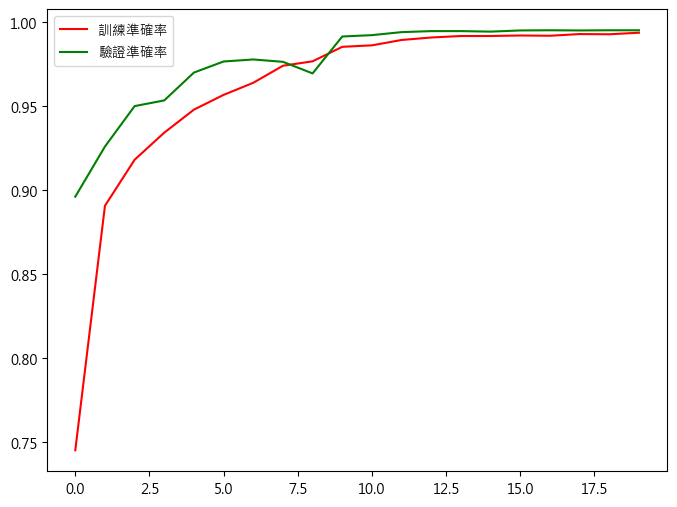

In [128]:
# 對訓練過程的準確率繪圖
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], 'r', label='訓練準確率')
plt.plot(history.history['val_accuracy'], 'g', label='驗證準確率')
plt.legend()

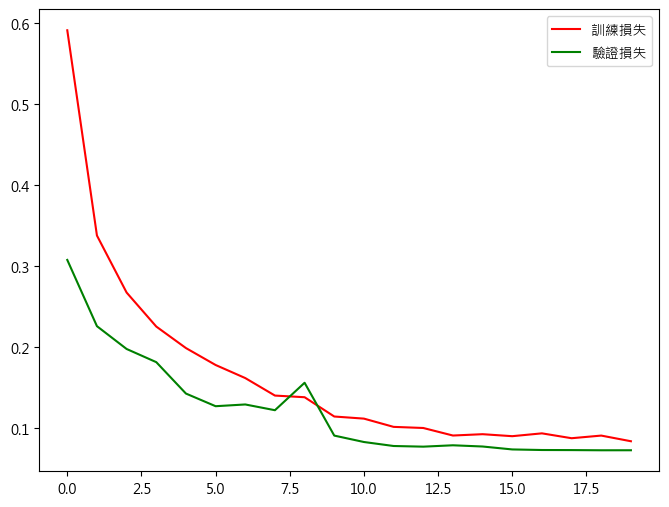

In [129]:
# 對訓練過程的損失繪圖
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], 'r', label='訓練損失')
plt.plot(history.history['val_loss'], 'g', label='驗證損失')
plt.legend()

In [130]:
#對測試集做判讀
model.predict(x_test)

782/782 [==============================] - 3s 4ms/step


array([[0.       ],
       [5.636931 ],
       [0.9135682],
       ...,
       [0.       ],
       [0.       ],
       [0.889042 ]], dtype=float32)